In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split



# Explore the data


In [ ]:
# Set parameters
project_id = 'ise543-419203'
location = 'us-central1'

In [ ]:
df = 'gs://ise543_final_pj/Final Project Dataset.csv'

df = pd.read_csv(df)


In [ ]:
df.dtypes

patientID            int64
male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
a1c                float64
income             float64
dtype: object

In [ ]:
df.count()

patientID          3816
male               3816
age                3816
education          3723
currentSmoker      3816
cigsPerDay         1841
BPMeds             3771
prevalentStroke    3816
prevalentHyp       3816
diabetes           3816
totChol            3769
sysBP              3816
diaBP              3816
BMI                3797
heartRate          3815
glucose            3455
TenYearCHD         3816
a1c                3455
income             3816
dtype: int64

In [ ]:
df.shape

(3816, 19)

In [ ]:
df.describe()

,patientID,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,a1c,income
count,3816.000000,3816.000000,3816.000000,3723.000000,3816.000000,1841.000000,3771.000000,3816.000000,3816.000000,3816.000000,3769.000000,3816.000000,3816.000000,3797.000000,3815.000000,3455.000000,3816.000000,3455.000000,3816.000000
mean,554019.064990,0.427673,49.567348,1.974483,0.489518,18.500272,0.029170,0.006027,0.306604,0.024895,240.852746,132.260089,82.874214,25.814791,75.775098,81.856151,0.151730,4.296312,20355.886792
std,257048.088884,0.494806,8.597611,1.018709,0.499956,10.925445,0.168305,0.077411,0.461144,0.155826,188.931740,22.119653,11.907613,4.099671,12.036836,23.571126,0.358806,1.193444,17865.579646
min,100002.000000,0.000000,32.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000,2.134769,12000.000000
25%,336251.750000,0.000000,42.000000,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000,3.738947,13562.500000
50%,555421.500000,0.000000,49.000000,2.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000,4.126325,16055.000000
75%,772812.250000,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.500000,89.500000,28.040000,82.000000,87.000000,0.000000,4.564732,21395.500000
max,999826.000000,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,9280.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000,19.917371,524494.000000


In [ ]:
df.head()

,patientID,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,a1c,income
0,131107,0,49,3.0,1,10.0,0.0,0,0,0,260.0,123.0,80.0,23.10,63.0,65.0,1,3.374776,20195.0
1,318975,1,43,1.0,1,25.0,0.0,0,0,0,201.0,121.0,82.0,23.84,70.0,91.0,0,5.003918,13585.0
2,222774,1,45,1.0,1,1.0,0.0,0,1,0,277.0,140.0,84.0,28.74,69.0,74.0,0,3.654142,27570.0
3,644306,0,63,3.0,1,10.0,0.0,0,1,0,236.0,189.0,103.0,27.91,60.0,74.0,0,4.220056,12217.0
4,101056,1,59,2.0,0,NaN,0.0,0,0,0,237.0,131.5,84.0,24.17,90.0,94.0,1,4.601007,16395.0


In [ ]:
df.isnull().sum()

patientID             0
male                  0
age                   0
education            93
currentSmoker         0
cigsPerDay         1975
BPMeds               45
prevalentStroke       0
prevalentHyp          0
diabetes              0
totChol              47
sysBP                 0
diaBP                 0
BMI                  19
heartRate             1
glucose             361
TenYearCHD            0
a1c                 361
income                0
dtype: int64

In [ ]:
# count unqiue
df['education'].nunique()

4

In [ ]:
df['education'].unique()

array([ 3.,  1.,  2., nan,  4.])

# Split the data

In [ ]:
split_ratio = 0.2
random_seed = 42


train, val = train_test_split(df, test_size=split_ratio, random_state=random_seed)


X_train = train.drop('TenYearCHD', axis=1)
y_train = train['TenYearCHD']
X_val = val.drop('TenYearCHD', axis=1)
y_val = val['TenYearCHD']


ID_train = X_train['patientID']
ID_val = X_val['patientID']

X_train = X_train.drop('patientID', axis=1)
X_val = X_val.drop('patientID', axis=1)

In [ ]:
X_train.isnull().sum()


male                  0
age                   0
education            72
currentSmoker         0
cigsPerDay         1549
BPMeds               39
prevalentStroke       0
prevalentHyp          0
diabetes              0
totChol              38
sysBP                 0
diaBP                 0
BMI                  15
heartRate             1
glucose             292
a1c                 292
income                0
dtype: int64

In [ ]:
y_train.isnull().sum()

0

# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Uni & Bivariate Viz

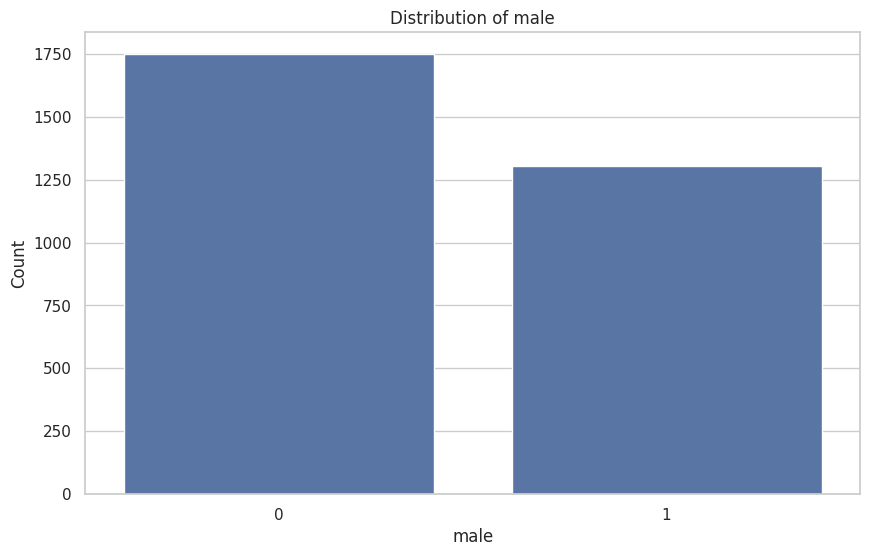

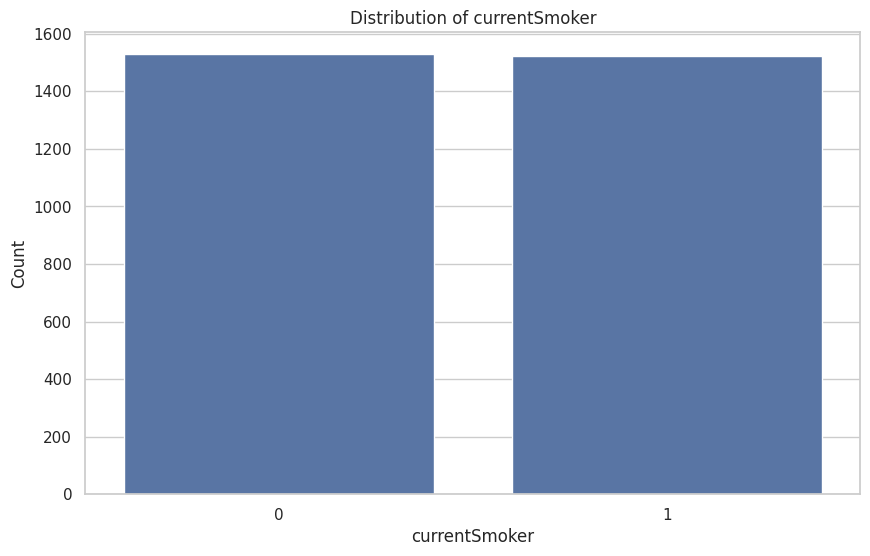

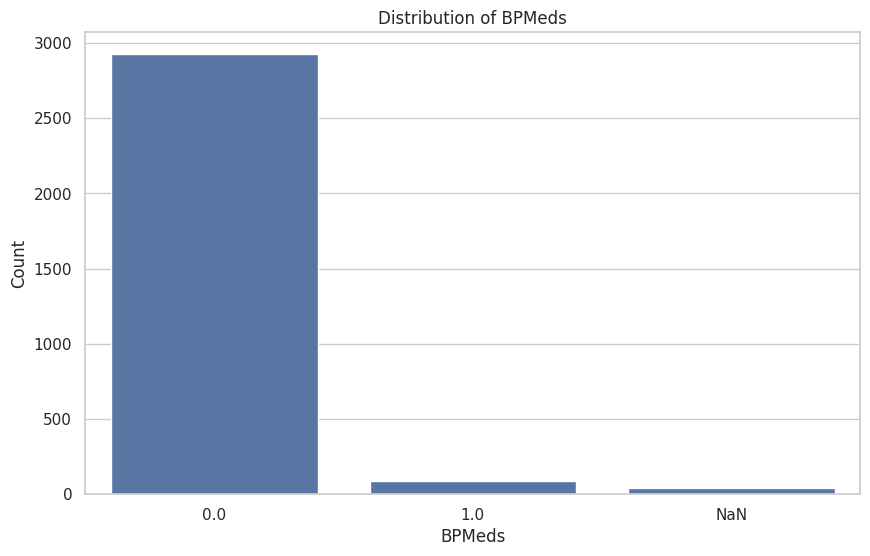

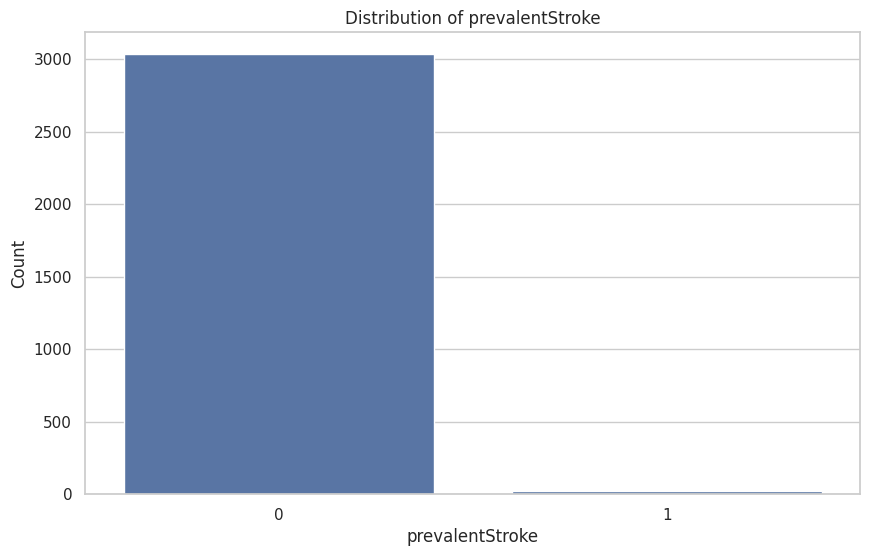

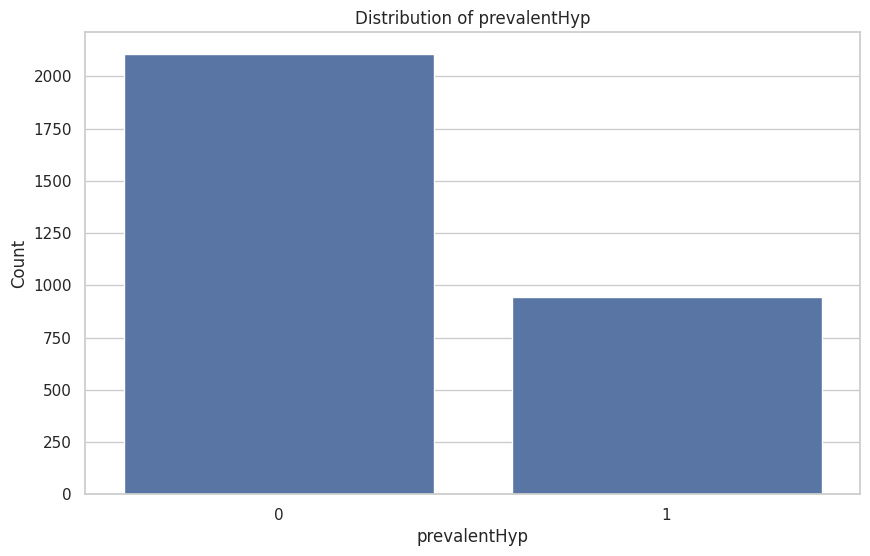

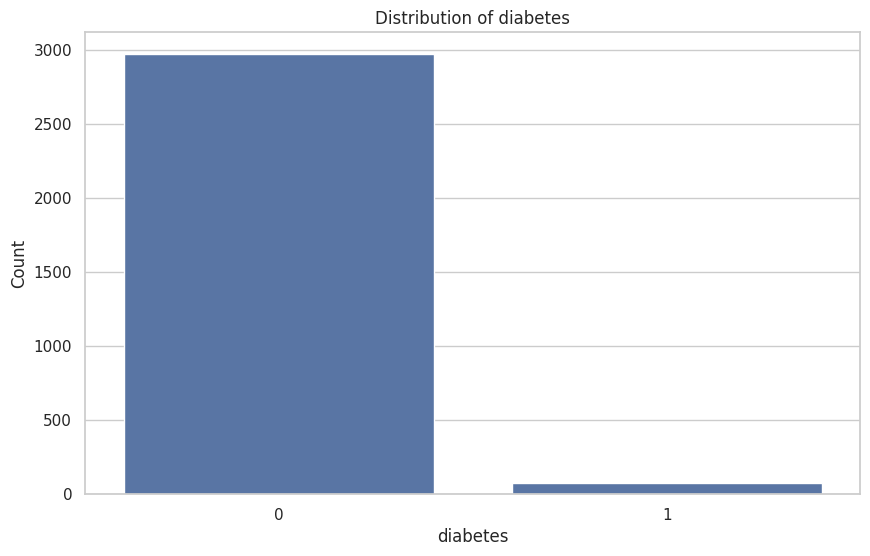

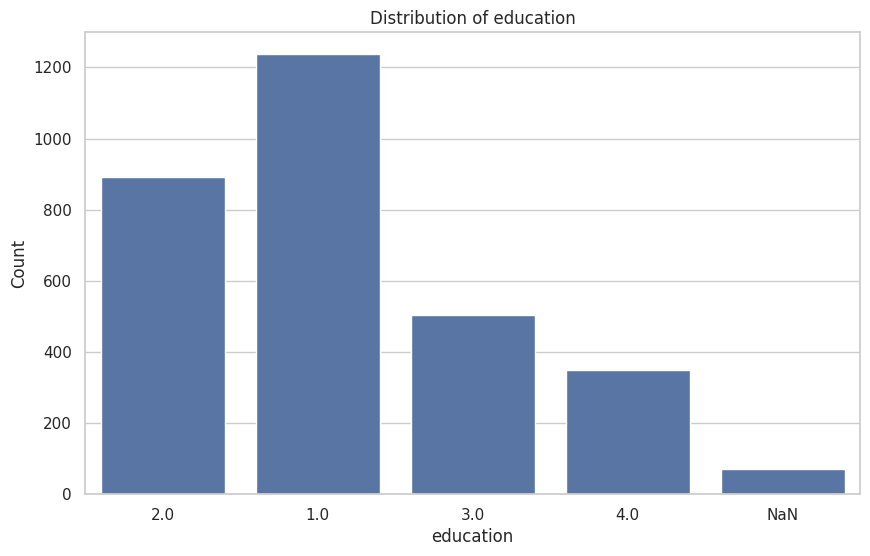

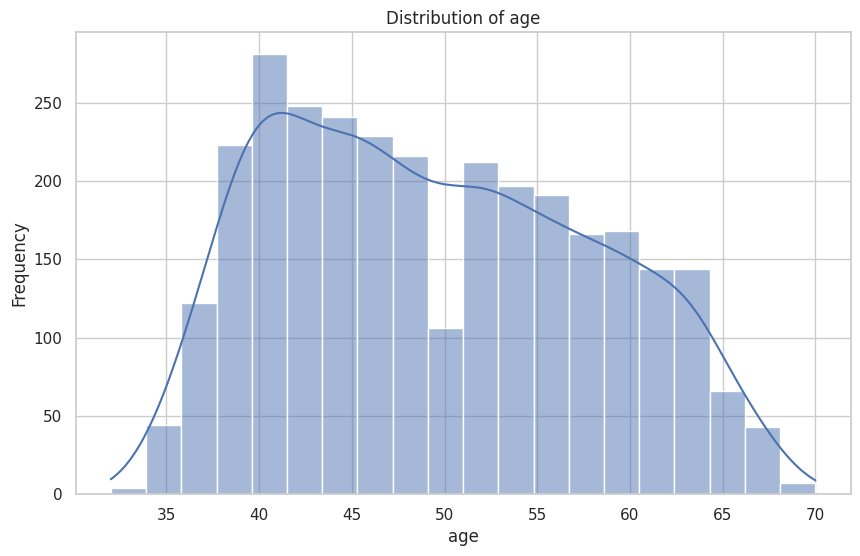

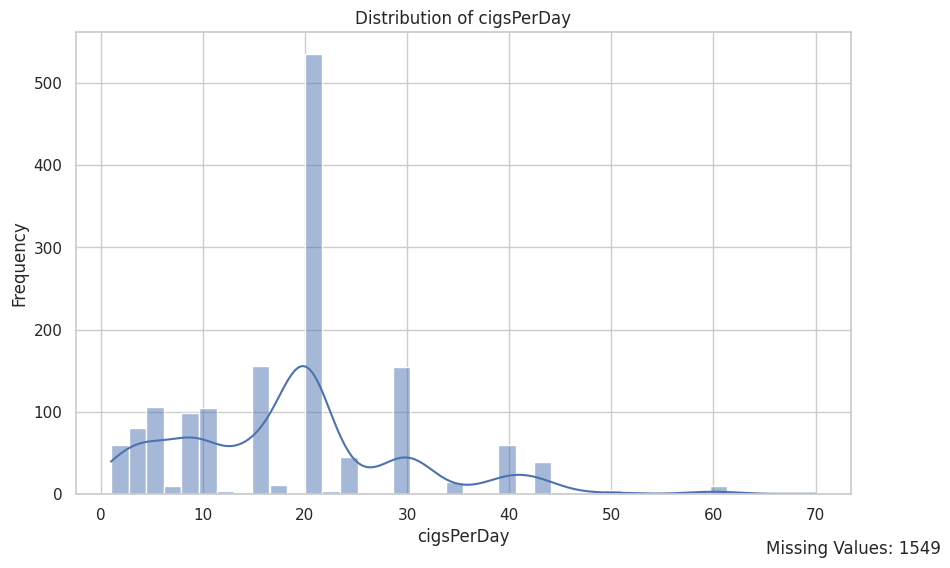

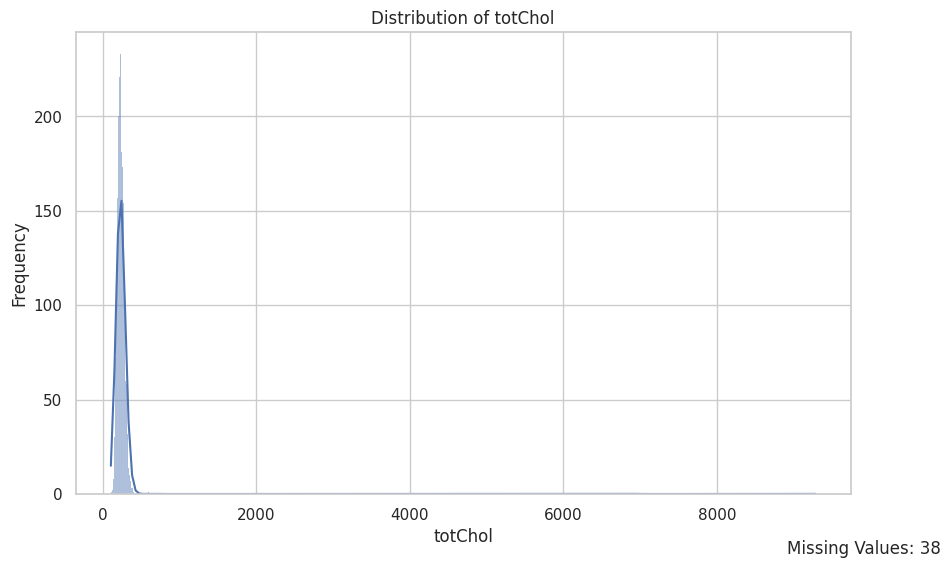

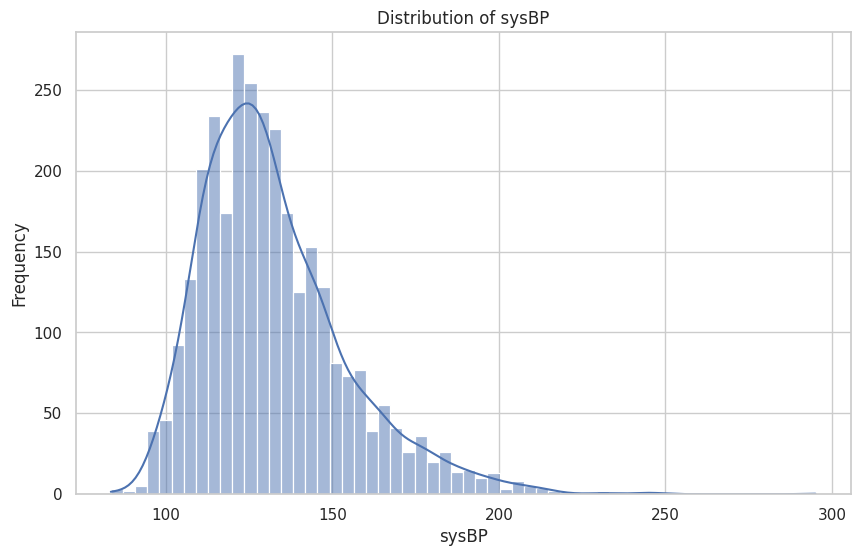

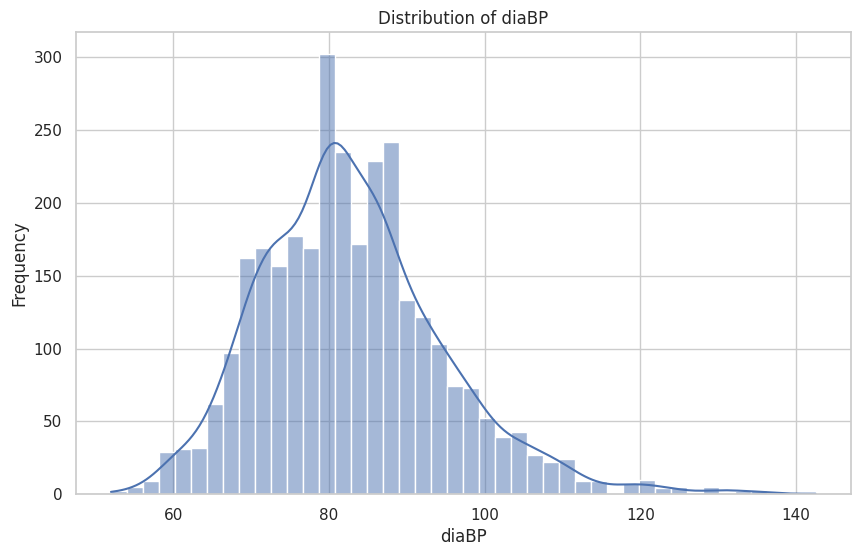

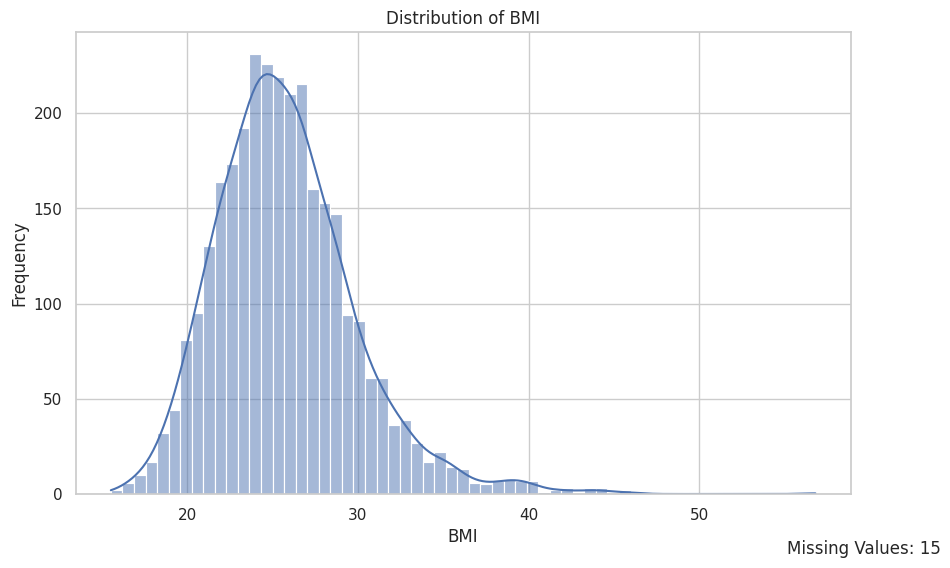

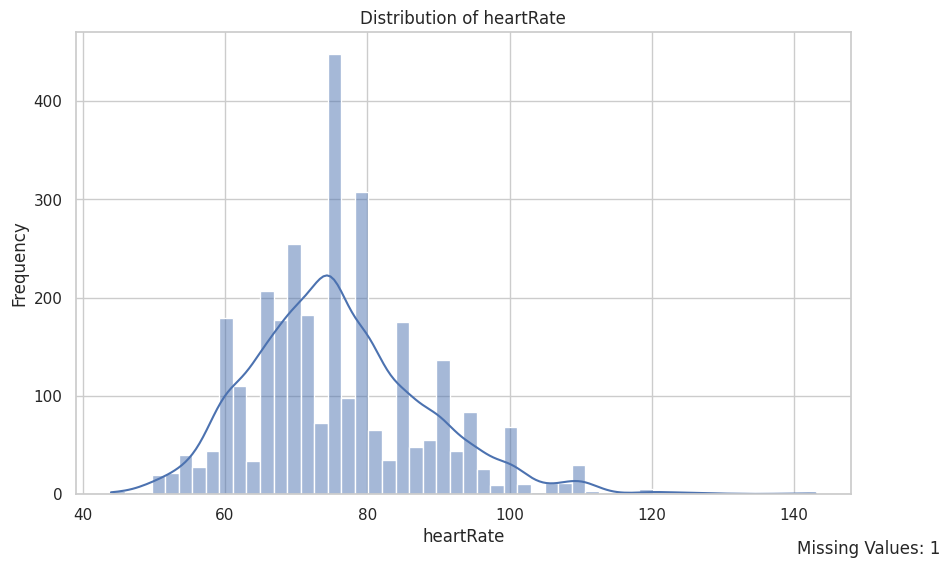

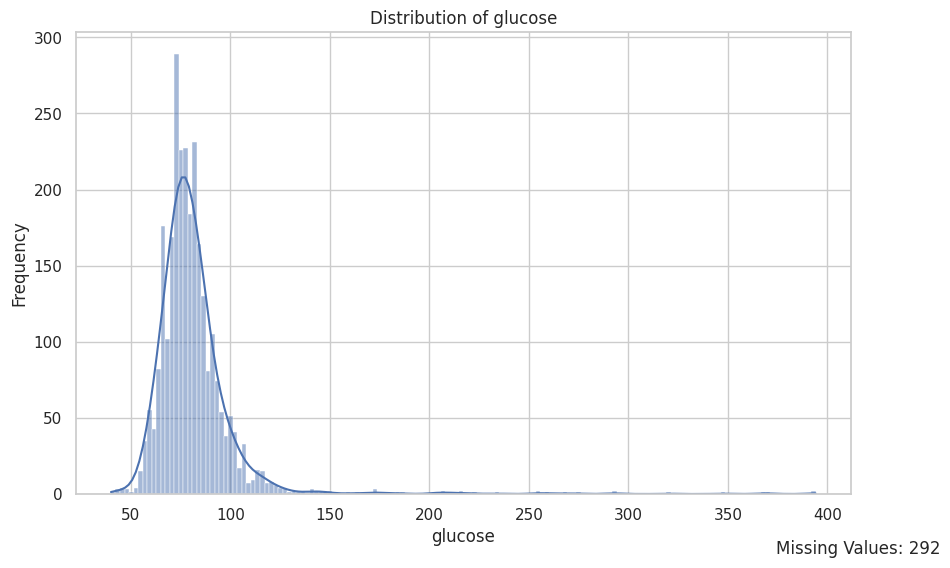

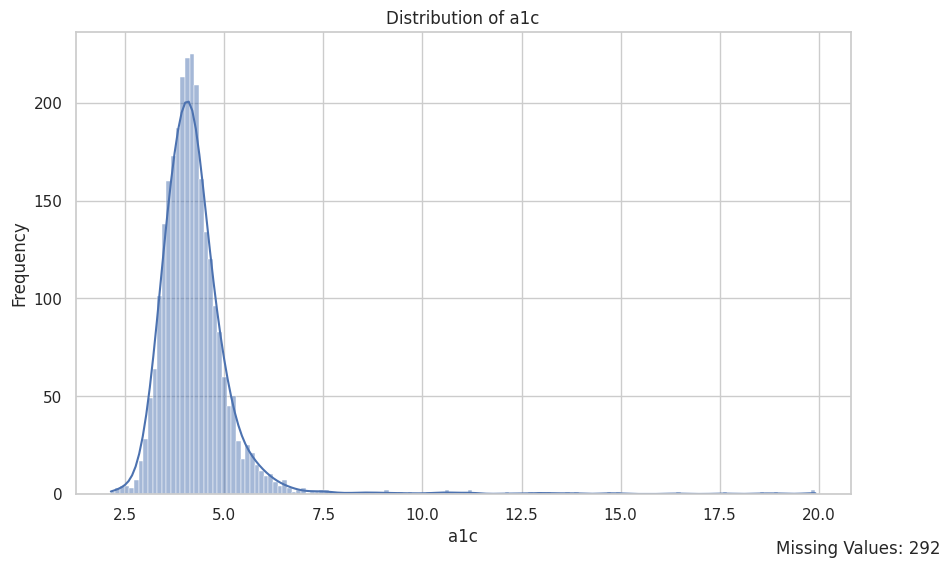

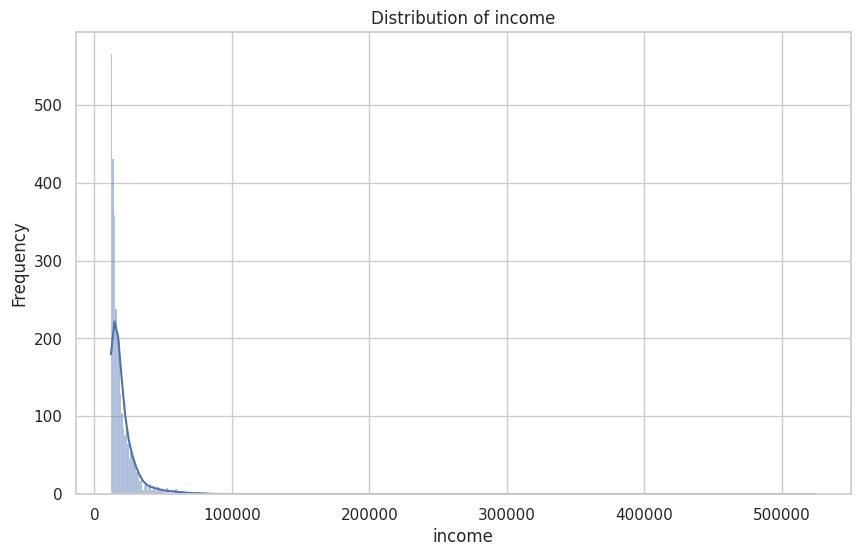

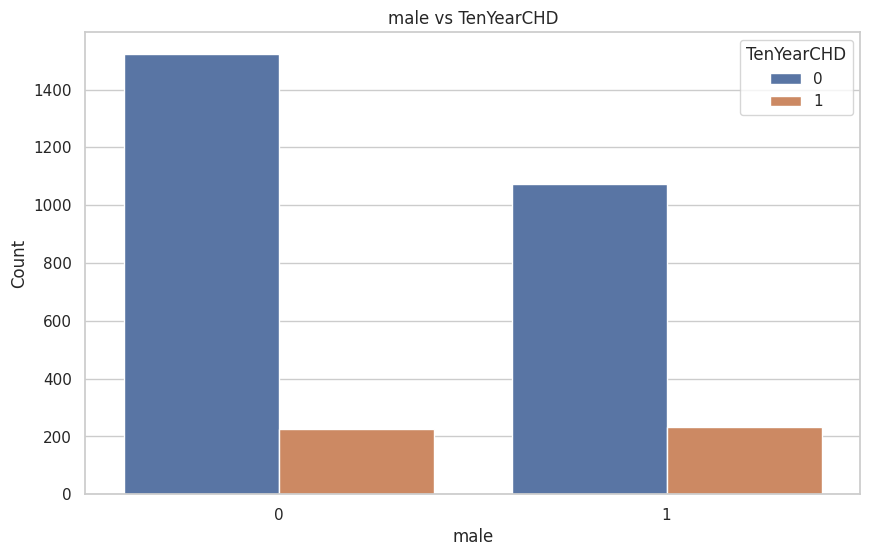

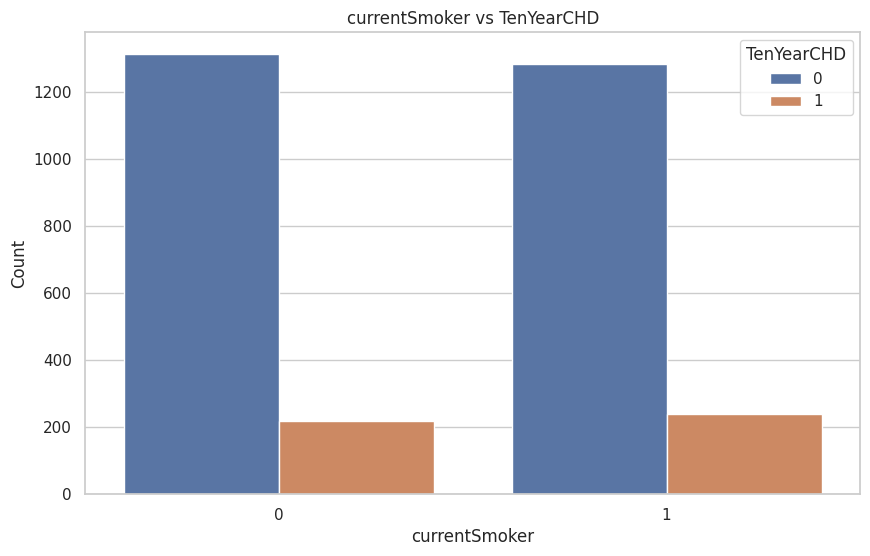

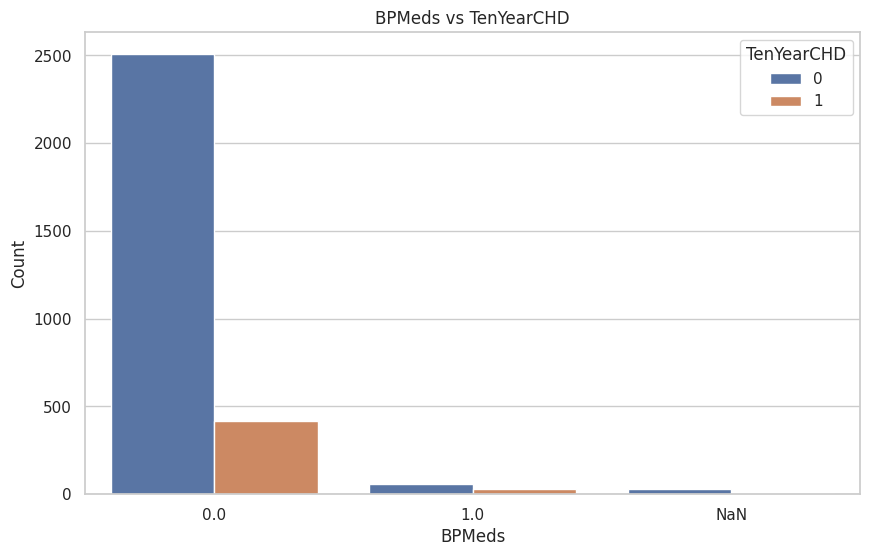

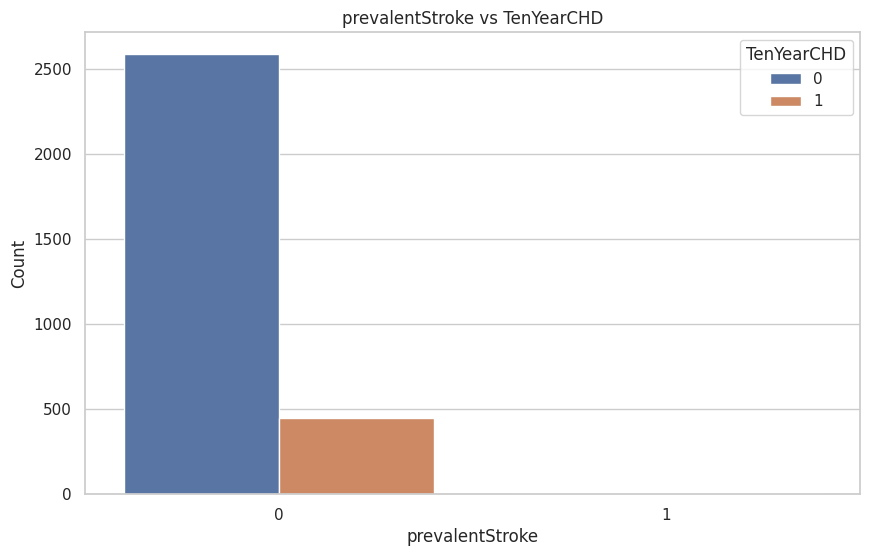

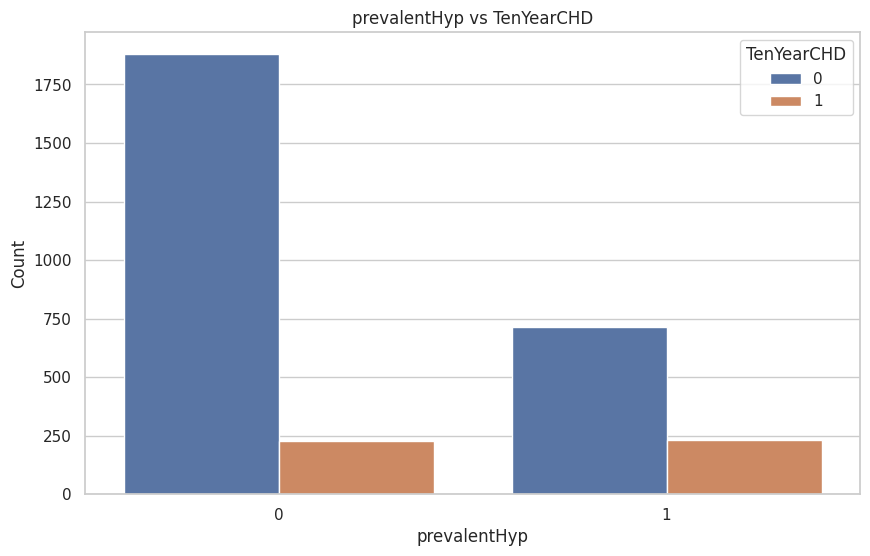

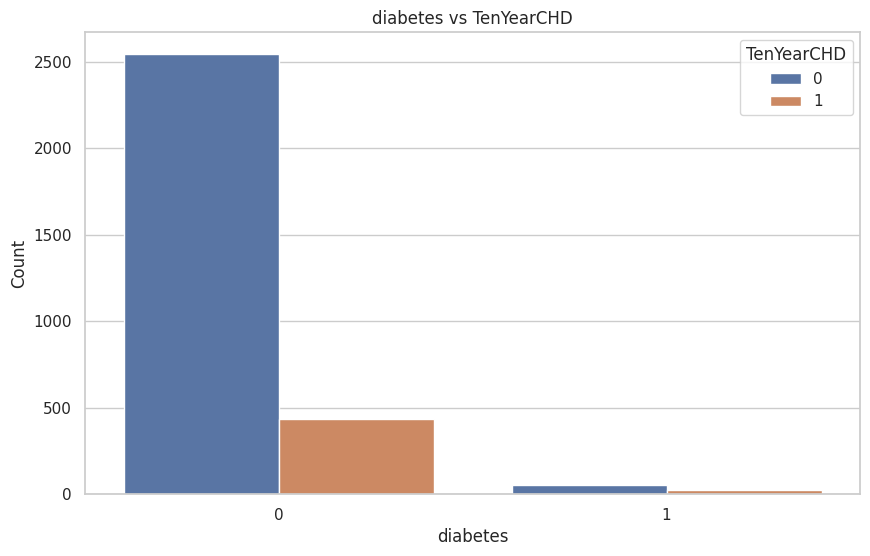

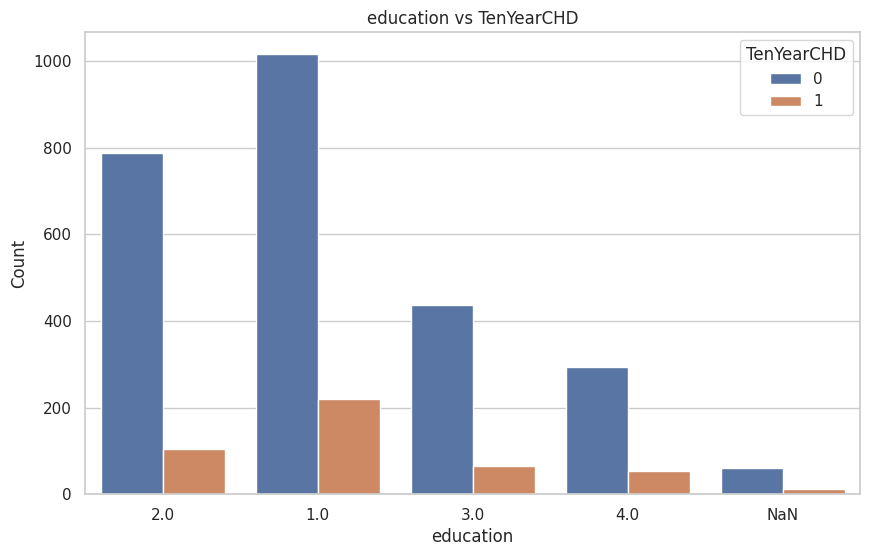

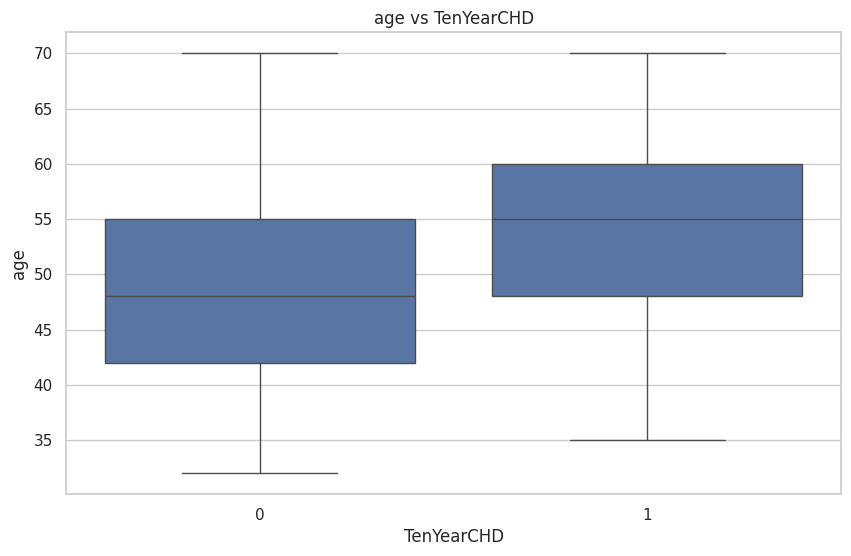

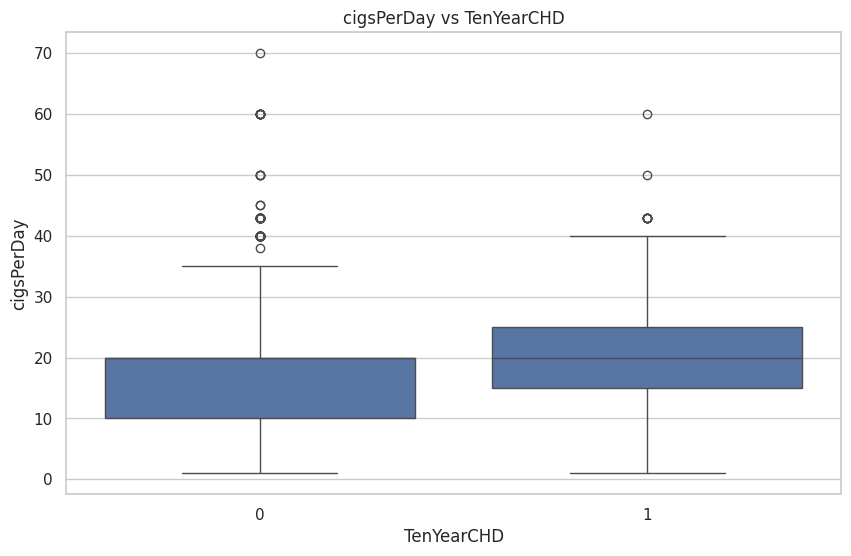

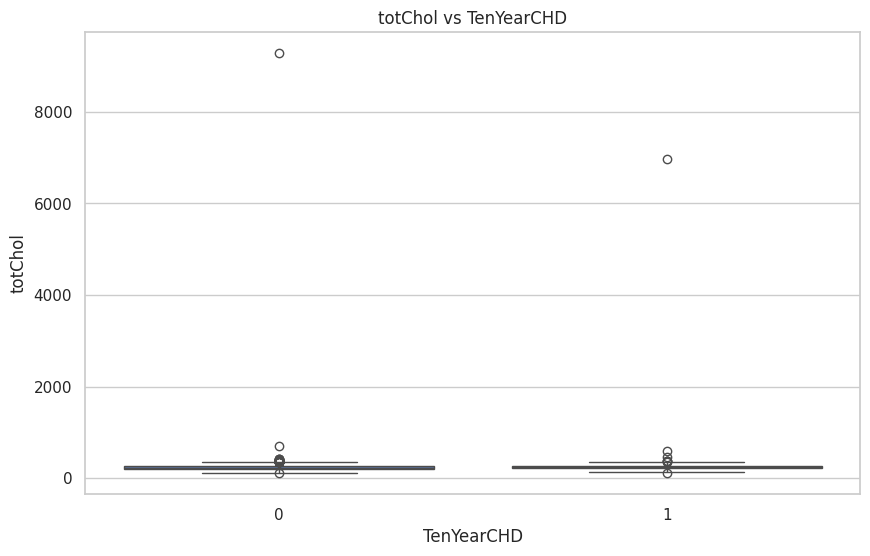

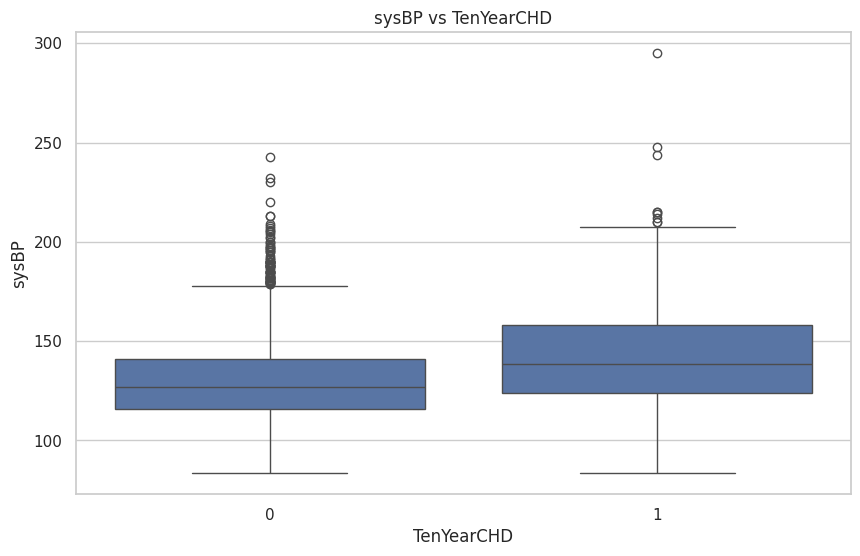

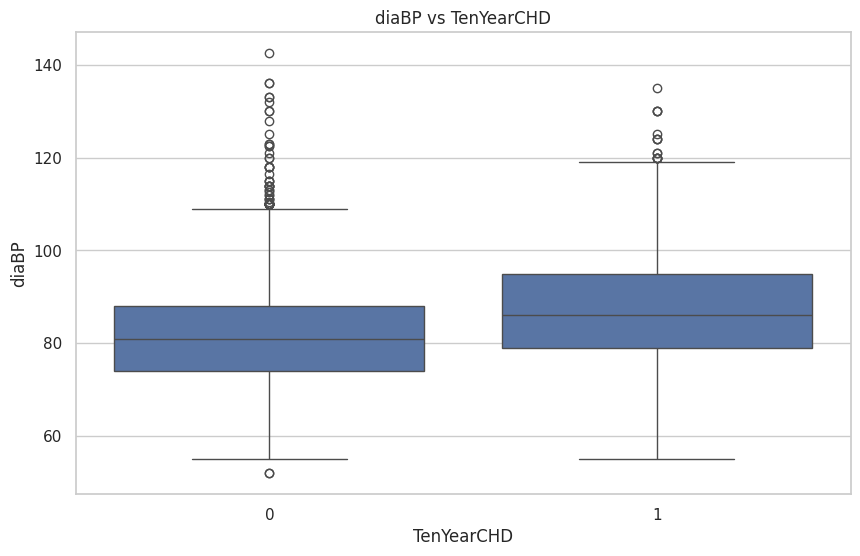

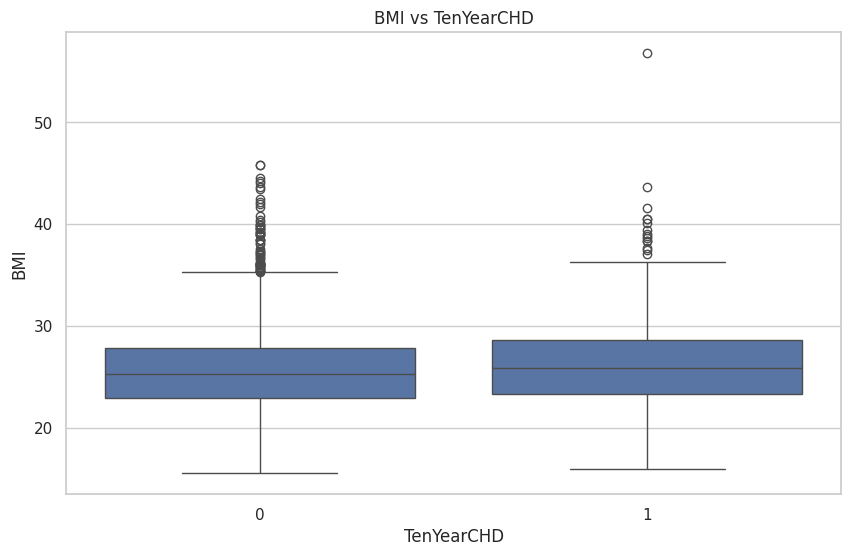

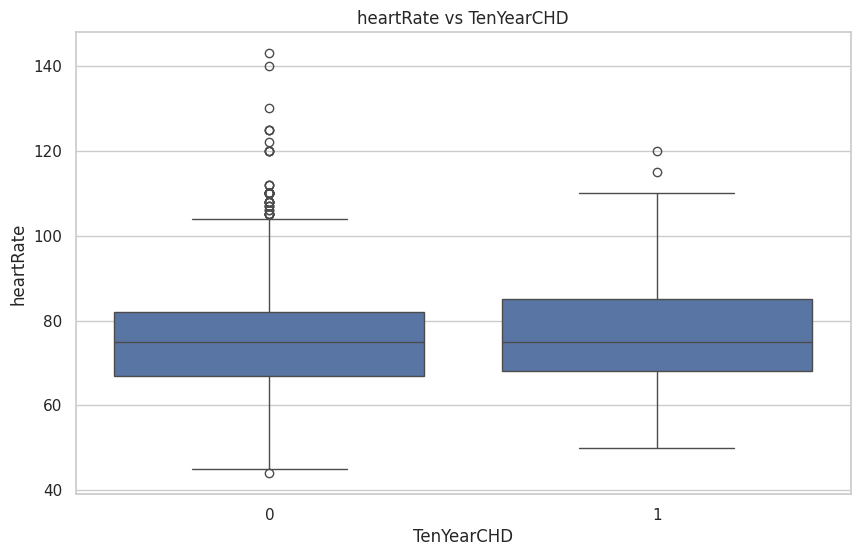

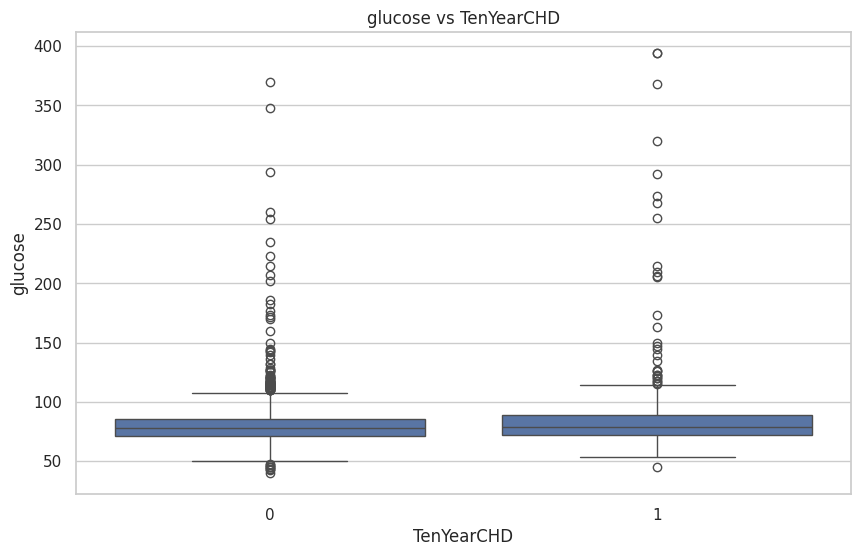

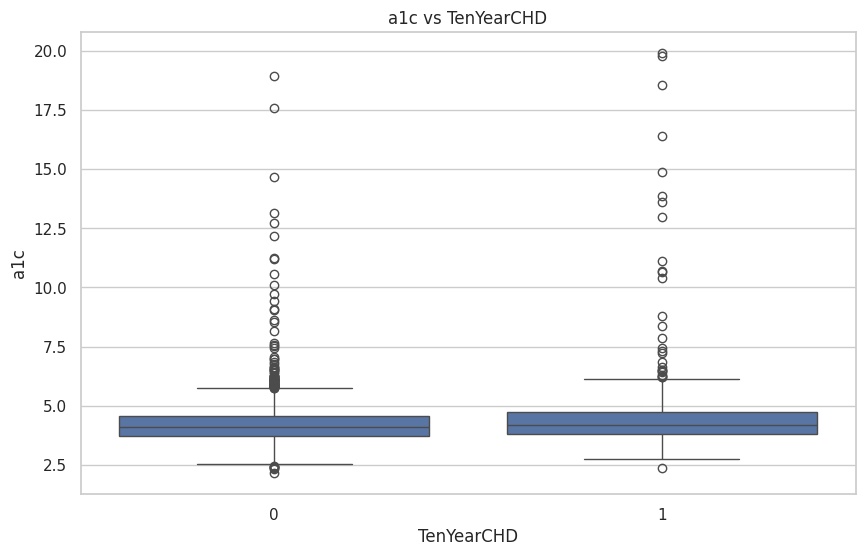

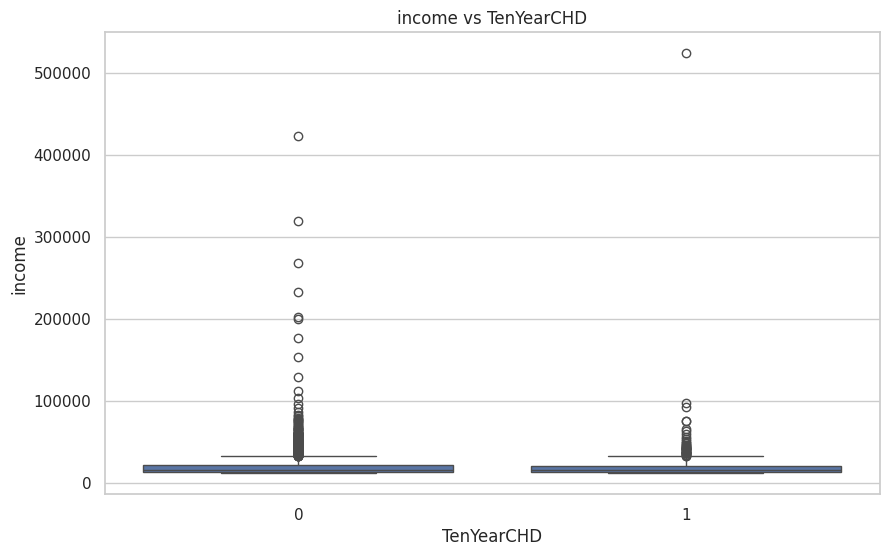

In [ ]:
sns.set(style="whitegrid")


#(Univariate visualization)

categorical_features = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'education']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))

    if X_train[feature].isnull().any():
        order = np.append(X_train[feature].dropna().unique(), 'NaN')
        temp_series = X_train[feature].fillna('NaN')
        sns.countplot(x=temp_series, data=X_train, order=order)
    else:
        sns.countplot(x=feature, data=X_train)
    plt.title(f'Distribution of {feature}')
    plt.ylabel('Count')
    plt.show()


continuous_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'a1c', 'income']
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(X_train[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.ylabel('Frequency')
    if X_train[feature].isnull().sum() > 0:
        plt.figtext(0.99, 0.01, f'Missing Values: {X_train[feature].isnull().sum()}', horizontalalignment='right')
    plt.show()

#(Bivariate visualization)
train_data = X_train.copy()
train_data['TenYearCHD'] = y_train

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    if train_data[feature].isnull().any():
        order = np.append(train_data[feature].dropna().unique(), 'NaN')
        temp_series = train_data[feature].fillna('NaN')
        sns.countplot(x=temp_series, hue='TenYearCHD', data=train_data, order=order)
    else:
        sns.countplot(x=feature, hue='TenYearCHD', data=train_data)
    plt.title(f'{feature} vs TenYearCHD')
    plt.ylabel('Count')
    plt.show()

for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='TenYearCHD', y=feature, data=train_data)
    plt.title(f'{feature} vs TenYearCHD')
    plt.ylabel(feature)
    plt.show()

In [ ]:
## Most continous variables are right-skewed

## Heat map


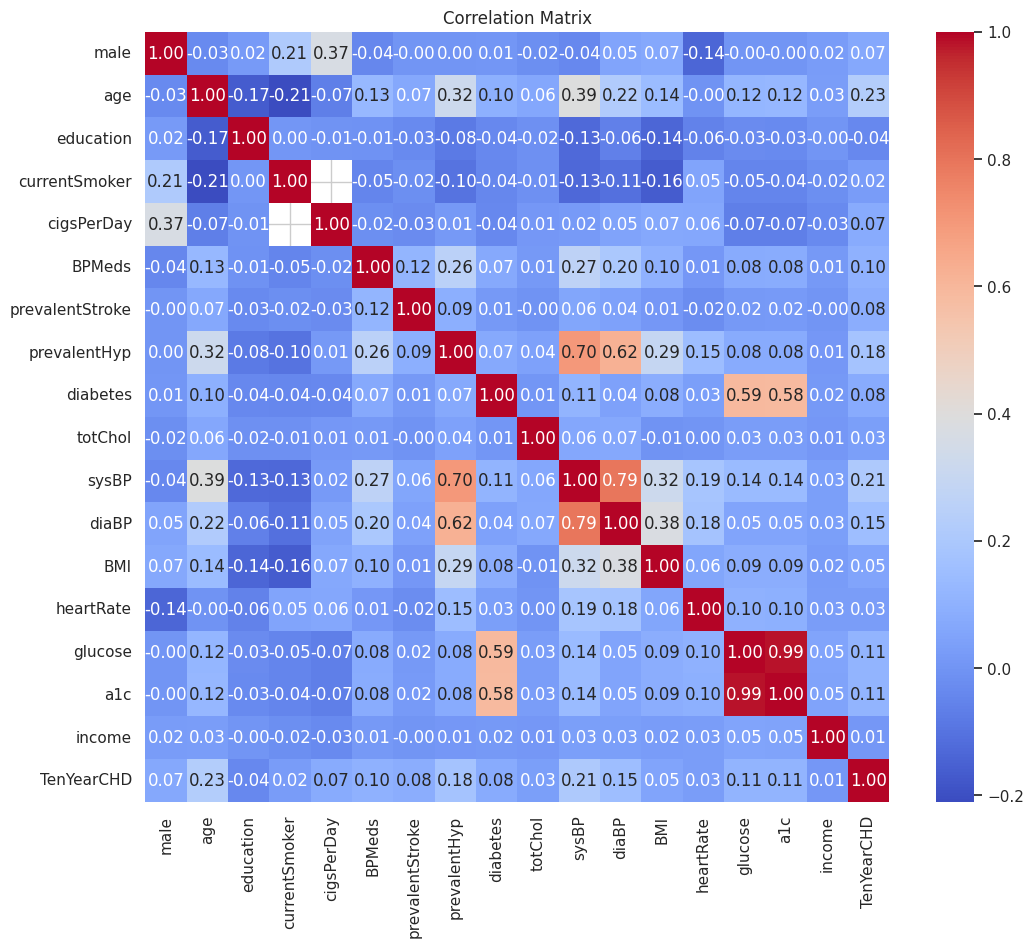

In [ ]:

data_for_correlation = X_train.copy()
data_for_correlation['TenYearCHD'] = y_train


correlation_matrix = data_for_correlation.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()



In [ ]:

high_correlation_with_response = correlation_matrix['TenYearCHD'].sort_values(ascending=False)


response_corr_threshold = 0.1

highly_correlated_features = high_correlation_with_response[
    abs(high_correlation_with_response) > response_corr_threshold
].index.tolist()
print(f"Features with high correlation to TenYearCHD (above {response_corr_threshold}): {highly_correlated_features}")


collinearity_threshold = 0.7


feature_correlations = correlation_matrix.drop('TenYearCHD').drop('TenYearCHD', axis=1)
collinear_features = set()

for i in range(len(feature_correlations.columns)):
    for j in range(i):
        if abs(feature_correlations.iloc[i, j]) > collinearity_threshold:
            collinear_features.add((feature_correlations.columns[i], feature_correlations.columns[j]))

print(f"Collinear feature pairs (above {collinearity_threshold}): {collinear_features}")


Features with high correlation to TenYearCHD (above 0.1): ['TenYearCHD', 'age', 'sysBP', 'prevalentHyp', 'diaBP', 'a1c', 'glucose', 'BPMeds']
Collinear feature pairs (above 0.7): {('diaBP', 'sysBP'), ('a1c', 'glucose')}


In [ ]:
# So, drop 'diaBP' and 'a1c'

# Biological Plausibility:
## Blood Glucose Level: High blood glucose levels over time can lead to damage in the blood vessels and heart, increasing the risk of CHD. This is often measured through fasting blood glucose or HbA1c levels.
## Hemoglobin: While hemoglobin itself might not be directly linked to CHD, variations such as high or low levels can indicate other underlying health conditions (like anemia or polycythemia) that could indirectly influence heart health.

In [ ]:
X_train.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
a1c                float64
income             float64
dtype: object

# Feature selection

In [ ]:

# X_train = X_train.drop(['diaBP', 'a1c'], axis=1)
X_train = X_train[['age', 'sysBP', 'prevalentHyp','glucose', 'BPMeds']]



# X_val = X_val.drop(['diaBP', 'a1c'], axis=1)
X_val = X_val[['age', 'sysBP', 'prevalentHyp', 'glucose', 'BPMeds']]


# Data preprocessing

## Data quality steps (dealing with missing values)

In [ ]:
X_train.isnull().sum()

age               0
sysBP             0
prevalentHyp      0
glucose         292
BPMeds           39
dtype: int64

In [ ]:
X_val.isnull().sum()

age              0
sysBP            0
prevalentHyp     0
glucose         69
BPMeds           6
dtype: int64

### Impute 'cigsPerDay' & 'education' in both X_train and X_val directly

In [ ]:
# I think the missing data are mainly from non-smokers and no educated people, so impute na = 0

# X_train.loc[:, ['cigsPerDay', 'education']] = X_train[['cigsPerDay', 'education']].fillna(0)


# X_val.loc[:, ['cigsPerDay', 'education']] = X_val[['cigsPerDay', 'education']].fillna(0)


In [ ]:
# X_train.isnull().sum()

In [ ]:
# X_val.isnull().sum()

### Impute 'BPMeds', 'glucose' by using thier mode and median in X_train

In [ ]:

mode_bpm = X_train['BPMeds'].mode()[0]
median_glucose = X_train['glucose'].median()


X_train = X_train.fillna({'BPMeds': mode_bpm, 'glucose': median_glucose})


X_val = X_val.fillna({'BPMeds': mode_bpm, 'glucose': median_glucose})




In [ ]:
X_train.isnull().sum()

age             0
sysBP           0
prevalentHyp    0
glucose         0
BPMeds          0
dtype: int64

In [ ]:
X_val.isnull().sum()

age             0
sysBP           0
prevalentHyp    0
glucose         0
BPMeds          0
dtype: int64

In [ ]:
X_train.shape


(3052, 5)

In [ ]:
y_train.shape

(3052,)

In [ ]:
X_val.shape

(764, 5)

In [ ]:
y_val.shape

(764,)

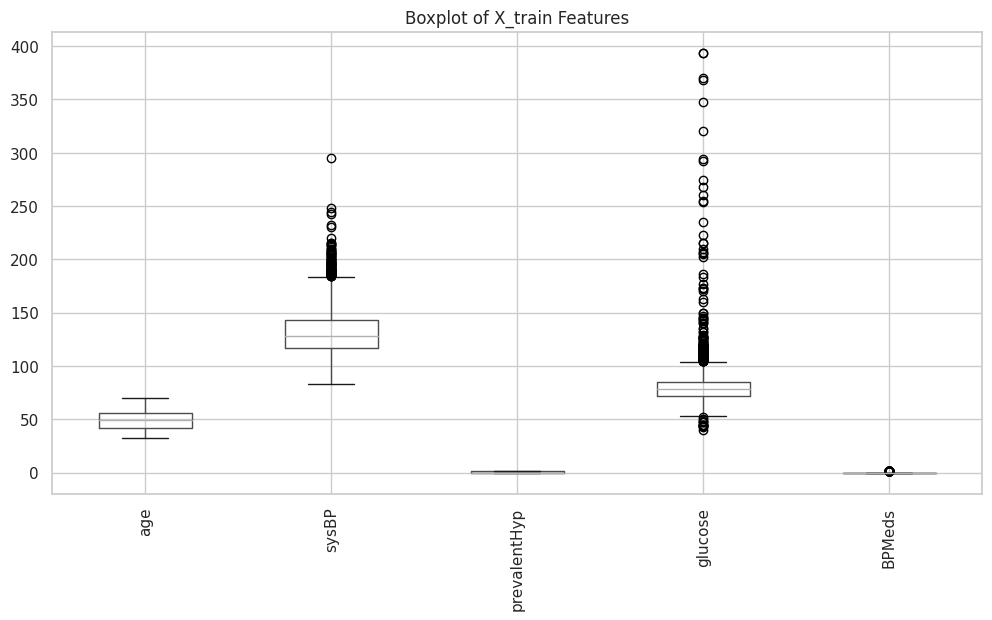

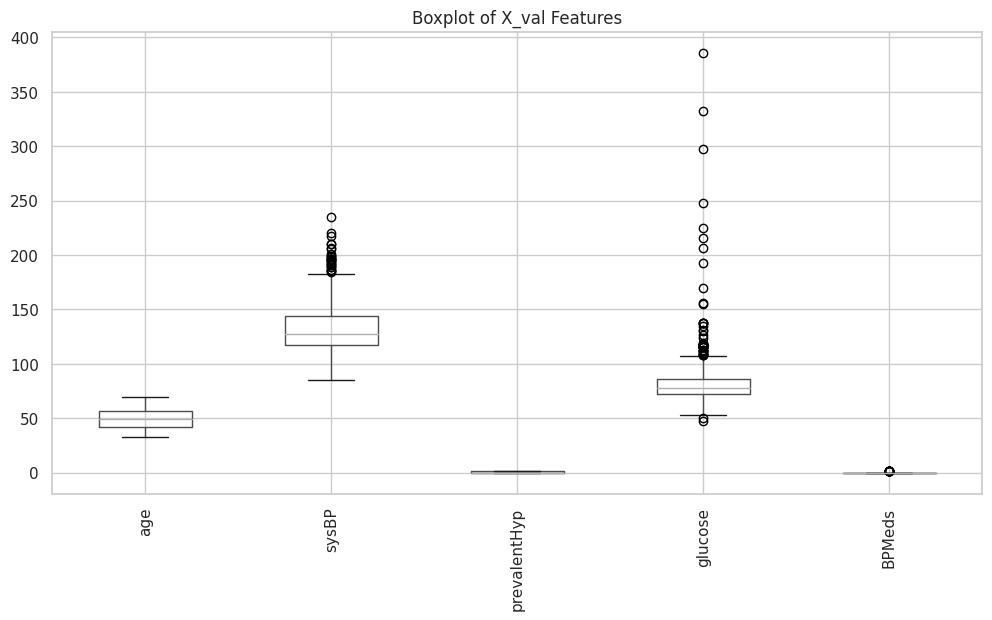

In [ ]:


X_train.boxplot(figsize=(12, 6))
plt.title('Boxplot of X_train Features')
plt.xticks(rotation=90)
plt.show()


X_val.boxplot(figsize=(12, 6))
plt.title('Boxplot of X_val Features')
plt.xticks(rotation=90)
plt.show()

## Data quality steps (dealing with outliers)

In [ ]:

# continuous_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose', 'income']
continuous_features = ['age', 'sysBP','glucose']

# IQR
Q1 = X_train[continuous_features].quantile(0.25)
Q3 = X_train[continuous_features].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


train_indices = ~((X_train[continuous_features] < lower_bound) | (X_train[continuous_features] > upper_bound)).any(axis=1)
val_indices = ~((X_val[continuous_features] < lower_bound) | (X_val[continuous_features] > upper_bound)).any(axis=1)


X_train = X_train[train_indices]
y_train = y_train[train_indices]


X_val = X_val[val_indices]
y_val = y_val[val_indices]





In [ ]:
X_train.shape

(2798, 5)

In [ ]:
y_train.shape

(2798,)

In [ ]:
X_val.shape

(686, 5)

In [ ]:
y_val.shape

(686,)

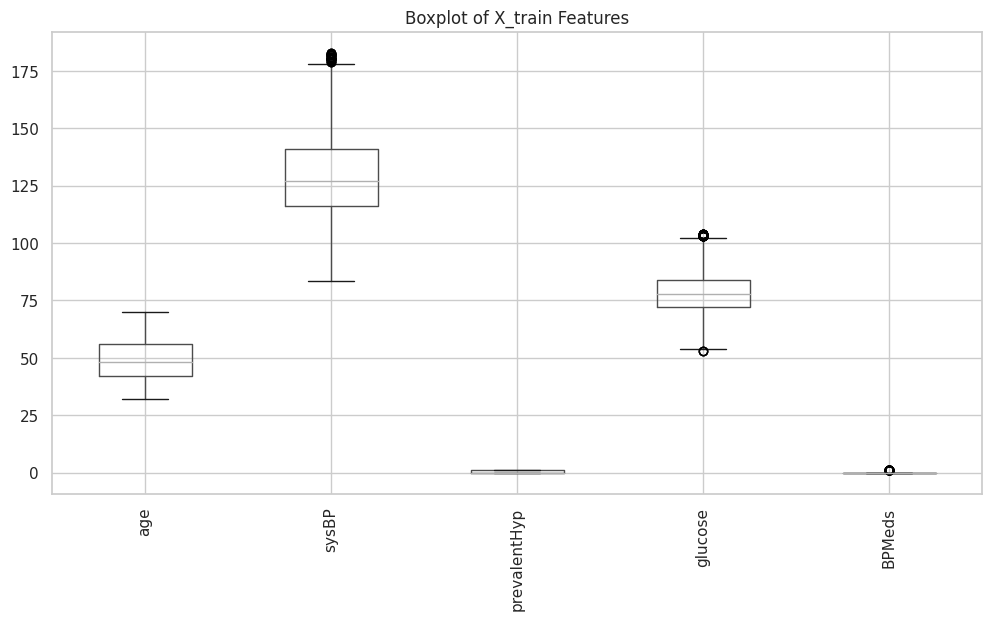

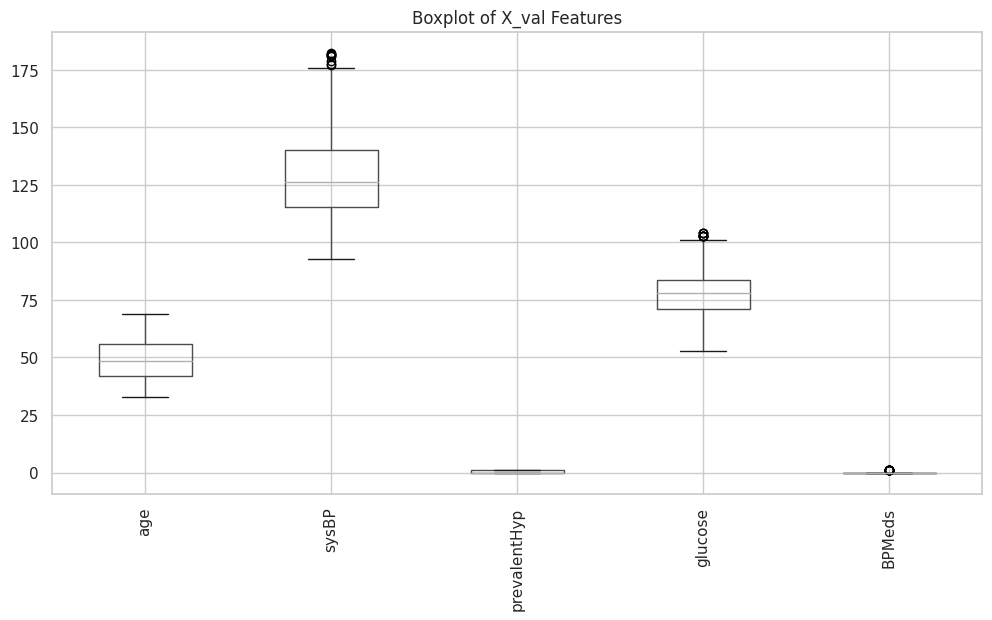

In [ ]:


X_train.boxplot(figsize=(12, 6))
plt.title('Boxplot of X_train Features')
plt.xticks(rotation=90)
plt.show()


X_val.boxplot(figsize=(12, 6))
plt.title('Boxplot of X_val Features')
plt.xticks(rotation=90)
plt.show()


## Deal with skewness

In [ ]:
def log_transform(x):
    return np.log1p(x) 


# continuous_features_pre = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose', 'income']
continuous_features_pre = ['age', 'sysBP', 'glucose']



X_train_log = X_train[continuous_features_pre] = X_train[continuous_features_pre].apply(log_transform)


X_val_log = X_val[continuous_features_pre] = X_val[continuous_features_pre].apply(log_transform)


Training Data Histograms:


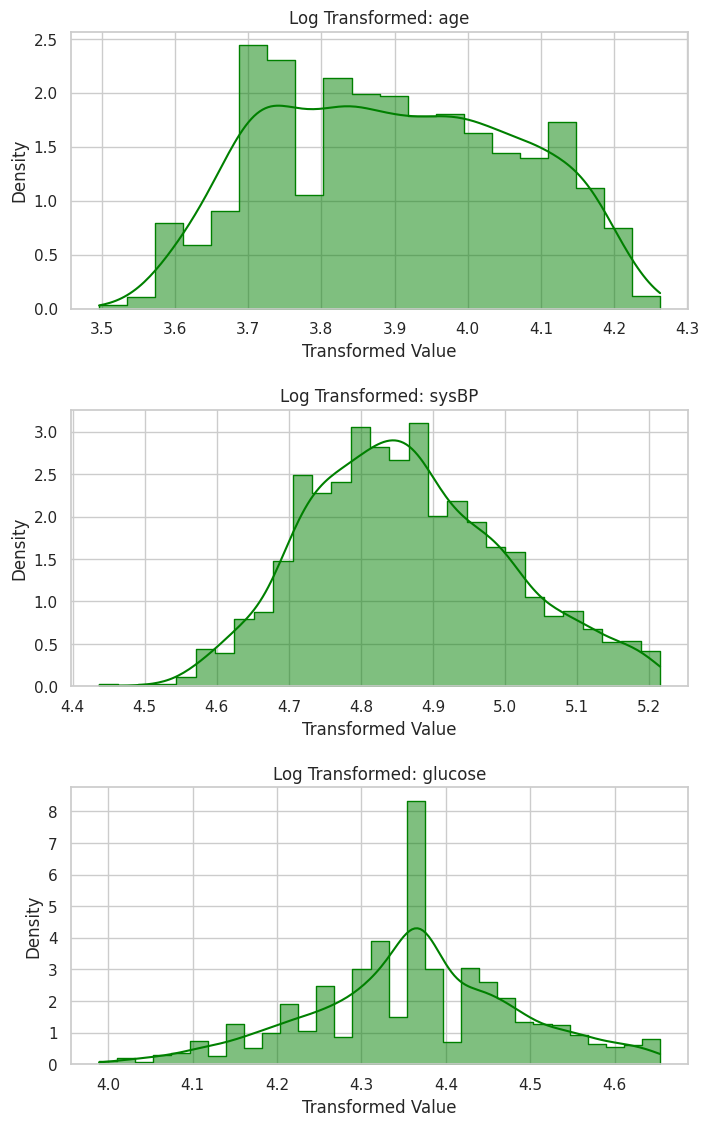

Validation Data Histograms:


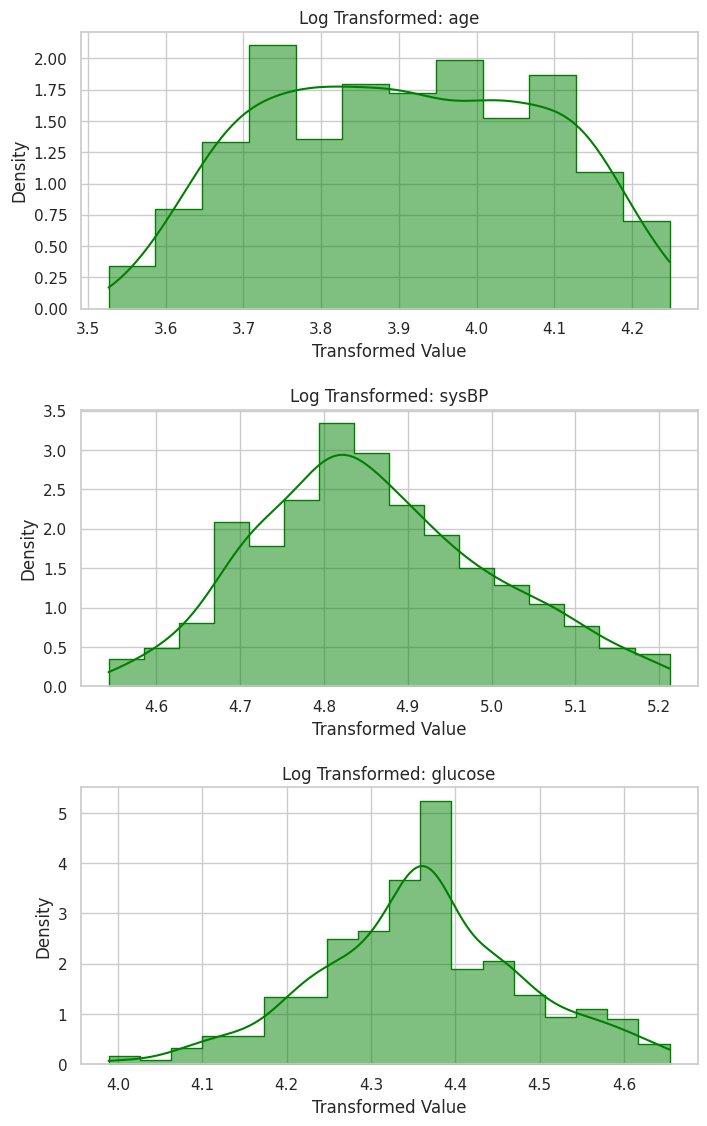

In [ ]:
def plot_histograms_seaborn(df, feature_names):
    """使用Seaborn绘制数据集的直方图"""
    num_plots = len(feature_names)
    fig, axes = plt.subplots(nrows=num_plots, figsize=(8, 4 * num_plots))
    fig.tight_layout(pad=4.0)

    if num_plots == 1:
        axes = [axes]  

    for ax, feature in zip(axes, feature_names):
        sns.histplot(df[feature], kde=True, ax=ax, color='green', element='step', stat="density")
        ax.set_title(f'Log Transformed: {feature}')
        ax.set_xlabel('Transformed Value')
        ax.set_ylabel('Density')

    plt.show()


print("Training Data Histograms:")
plot_histograms_seaborn(X_train_log, continuous_features_pre)


print("Validation Data Histograms:")
plot_histograms_seaborn(X_val_log, continuous_features_pre)

# Feature engineering

In [ ]:
# X_train_log = X_train
# X_val_log = X_val

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#categorical_features = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'education']

# continuous_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose', 'income']
continuous_features = ['age', 'sysBP','glucose']
scaler = StandardScaler()


scaler.fit(X_train_log[continuous_features])  


X_train_scaled = X_train_log[continuous_features] = scaler.transform(X_train_log[continuous_features])
X_val_scaled = X_val_log[continuous_features] = scaler.transform(X_val_log[continuous_features])



In [ ]:
X_val_scaled.dtype

dtype('float64')

## Apply oversampling method (SMOTE) only on training set

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)


X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train_scaled, y_train)

print("Category distribution in the original training set：\n", y_train.value_counts())
print("Category distribution after applying SMOTE：\n", y_train_SMOTE.value_counts())


Category distribution in the original training set：
 TenYearCHD
0    2416
1     382
Name: count, dtype: int64
Category distribution after applying SMOTE：
 TenYearCHD
0    2416
1    2416
Name: count, dtype: int64


In [ ]:
# from imblearn.over_sampling import SVMSMOTE

# # Create an SVMSMOTE object with a specific random state for reproducibility
# svm_smote = SVMSMOTE(random_state=42)

# # Resample the dataset
# X_train_SVMSMOTE, y_train_SVMSMOTE = svm_smote.fit_resample(X_train_scaled, y_train)

# # Print the category distribution before and after applying SVMSMOTE
# print("Category distribution in the original training set:\n", y_train.value_counts())
# print("Category distribution after applying SVMSMOTE:\n", y_train_SVMSMOTE.value_counts())


In [ ]:
# from imblearn.over_sampling import BorderlineSMOTE

# # Create a BorderlineSMOTE object with a specific random state for reproducibility
# borderline_smote = BorderlineSMOTE(random_state=42, kind='borderline-1')

# # Resample the dataset
# X_train_BorderlineSMOTE, y_train_BorderlineSMOTE = borderline_smote.fit_resample(X_train_scaled, y_train)

# # Print the category distribution before and after applying Borderline SMOTE
# print("Category distribution in the original training set:\n", y_train.value_counts())
# print("Category distribution after applying Borderline SMOTE:\n", y_train_BorderlineSMOTE.value_counts())


In [ ]:
# X_train_SMOTE, y_train_SMOTE = X_train_scaled, y_train

In [ ]:
# X_train_SMOTE, y_train_SMOTE = X_train_SVMSMOTE, y_train_SVMSMOTE

In [ ]:
# X_train_SMOTE, y_train_SMOTE = X_train_BorderlineSMOTE, y_train_BorderlineSMOTE

In [ ]:
# X_train_SMOTE.describe

In [ ]:
# y_train_SMOTE.describe

# Modeling

In [ ]:
y_val.value_counts()

TenYearCHD
0    585
1    101
Name: count, dtype: int64

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, auc


logistic_model = LogisticRegression()
logistic_model.fit(X_train_SMOTE, y_train_SMOTE)


logistic_predictions = logistic_model.predict(X_val_scaled)
logistic_probs = logistic_model.predict_proba(X_val_scaled)[:, 1]  


logistic_accuracy = accuracy_score(y_val, logistic_predictions)
logistic_precision = precision_score(y_val, logistic_predictions, average='weighted')
logistic_recall = recall_score(y_val, logistic_predictions, average='weighted')
logistic_f1 = f1_score(y_val, logistic_predictions, average='weighted')


logistic_conf_matrix = confusion_matrix(y_val, logistic_predictions)


precision, recall, _ = precision_recall_curve(y_val, logistic_probs)
auc_pr = auc(recall, precision)


print(f'Logistic Regression Accuracy: {logistic_accuracy:.2f}')
print(f'Logistic Regression Precision: {logistic_precision:.2f}')
print(f'Logistic Regression Recall: {logistic_recall:.2f}')
print(f'Logistic Regression F1 Score: {logistic_f1:.2f}')
print(f'Area Under the Precision-Recall Curve (AUC-PR): {auc_pr:.2f}')
print('Logistic Regression Confusion Matrix:')
print(logistic_conf_matrix)




Logistic Regression Accuracy: 0.62
Logistic Regression Precision: 0.81
Logistic Regression Recall: 0.62
Logistic Regression F1 Score: 0.67
Area Under the Precision-Recall Curve (AUC-PR): 0.25
Logistic Regression Confusion Matrix:
[[356 229]
 [ 35  66]]


## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, auc



random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_SMOTE, y_train_SMOTE)


rf_predictions = random_forest_model.predict(X_val_scaled)
rf_probs = random_forest_model.predict_proba(X_val_scaled)[:, 1]


rf_accuracy = accuracy_score(y_val, rf_predictions)
rf_precision = precision_score(y_val, rf_predictions, average='weighted')
rf_recall = recall_score(y_val, rf_predictions, average='weighted')
rf_f1 = f1_score(y_val, rf_predictions, average='weighted')


precision_rf, recall_rf, _ = precision_recall_curve(y_val, rf_probs)
rf_auc_pr = auc(recall_rf, precision_rf)


print(f'Random Forest Accuracy: {rf_accuracy:.2f}')
print(f'Random Forest Precision: {rf_precision:.2f}')
print(f'Random Forest Recall: {rf_recall:.2f}')
print(f'Random Forest F1 Score: {rf_f1:.2f}')
print(f'Area Under the Precision-Recall Curve (AUC-PR): {rf_auc_pr:.2f}')
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_val, rf_predictions))



Random Forest Accuracy: 0.78
Random Forest Precision: 0.77
Random Forest Recall: 0.78
Random Forest F1 Score: 0.77
Area Under the Precision-Recall Curve (AUC-PR): 0.19
Random Forest Confusion Matrix:
[[515  70]
 [ 81  20]]


## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



svm_model = SVC(probability=True)
svm_model.fit(X_train_SMOTE, y_train_SMOTE)


svm_predictions = svm_model.predict(X_val_scaled)
svm_probs = svm_model.predict_proba(X_val_scaled)[:, 1]


svm_accuracy = accuracy_score(y_val, svm_predictions)
svm_precision = precision_score(y_val, svm_predictions, average='weighted')
svm_recall = recall_score(y_val, svm_predictions, average='weighted')
svm_f1 = f1_score(y_val, svm_predictions, average='weighted')


precision_svm, recall_svm, _ = precision_recall_curve(y_val, svm_probs)
svm_auc_pr = auc(recall_svm, precision_svm)


print(f'SVM Accuracy: {svm_accuracy:.2f}')
print(f'SVM Precision: {svm_precision:.2f}')
print(f'SVM Recall: {svm_recall:.2f}')
print(f'SVM F1 Score: {svm_f1:.2f}')
print(f'Area Under the Precision-Recall Curve (AUC-PR): {svm_auc_pr:.2f}')
print('SVM Confusion Matrix:')
print(confusion_matrix(y_val, svm_predictions))


SVM Accuracy: 0.59
SVM Precision: 0.80
SVM Recall: 0.59
SVM F1 Score: 0.65
Area Under the Precision-Recall Curve (AUC-PR): 0.23
SVM Confusion Matrix:
[[340 245]
 [ 35  66]]


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier()
knn_model.fit(X_train_SMOTE, y_train_SMOTE)


knn_predictions = knn_model.predict(X_val_scaled)
knn_probs = knn_model.predict_proba(X_val_scaled)[:, 1]


knn_accuracy = accuracy_score(y_val, knn_predictions)
knn_precision = precision_score(y_val, knn_predictions, average='weighted')
knn_recall = recall_score(y_val, knn_predictions, average='weighted')
knn_f1 = f1_score(y_val, knn_predictions, average='weighted')


precision_knn, recall_knn, _ = precision_recall_curve(y_val, knn_probs)
knn_auc_pr = auc(recall_knn, precision_knn)


print(f'KNN Accuracy: {knn_accuracy:.2f}')
print(f'KNN Precision: {knn_precision:.2f}')
print(f'KNN Recall: {knn_recall:.2f}')
print(f'KNN F1 Score: {knn_f1:.2f}')
print(f'Area Under the Precision-Recall Curve (AUC-PR): {knn_auc_pr:.2f}')
print('KNN Confusion Matrix:')
print(confusion_matrix(y_val, knn_predictions))




KNN Accuracy: 0.65
KNN Precision: 0.78
KNN Recall: 0.65
KNN F1 Score: 0.70
Area Under the Precision-Recall Curve (AUC-PR): 0.23
KNN Confusion Matrix:
[[402 183]
 [ 56  45]]


## Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB


nb_model = GaussianNB()
nb_model.fit(X_train_SMOTE, y_train_SMOTE)


nb_predictions = nb_model.predict(X_val_scaled)
nb_probs = nb_model.predict_proba(X_val_scaled)[:, 1]


nb_accuracy = accuracy_score(y_val, nb_predictions)
nb_precision = precision_score(y_val, nb_predictions, average='weighted')
nb_recall = recall_score(y_val, nb_predictions, average='weighted')
nb_f1 = f1_score(y_val, nb_predictions, average='weighted')


precision_nb, recall_nb, _ = precision_recall_curve(y_val, nb_probs)
nb_auc_pr = auc(recall_nb, precision_nb)


print(f'Naive Bayes Accuracy: {nb_accuracy:.2f}')
print(f'Naive Bayes Precision: {nb_precision:.2f}')
print(f'Naive Bayes Recall: {nb_recall:.2f}')
print(f'Naive Bayes F1 Score: {nb_f1:.2f}')
print(f'Area Under the Precision-Recall Curve (AUC-PR): {nb_auc_pr:.2f}')
print('Naive Bayes Confusion Matrix:')
print(confusion_matrix(y_val, nb_predictions))


Naive Bayes Accuracy: 0.61
Naive Bayes Precision: 0.82
Naive Bayes Recall: 0.61
Naive Bayes F1 Score: 0.67
Area Under the Precision-Recall Curve (AUC-PR): 0.25
Naive Bayes Confusion Matrix:
[[347 238]
 [ 30  71]]
